In [6]:
# Make IPython notebook wider see -> https://gist.github.com/paulochf/f6c9ed0b39f85dd85270

# from IPython.display import display, HTML

# display(HTML(data="""
# <style>
#     div#notebook-container    { width: 95%; }
#     div#menubar-container     { width: 65%; }
#     div#maintoolbar-container { width: 99%; }
# </style>
# """))

In [7]:
# %matplotlib inline
# %matplotlib qt
%matplotlib notebook

from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
# plt.rcParams["figure.figsize"] = (13,13)
np.set_printoptions(precision=4)
pd.options.display.max_rows = 4

data = None

# Read all file in folder
folder = 'SpectralReflectance'
for fileName in os.listdir(folder):
    if '.csv' in fileName:

        colName = fileName[16:-4]
        tmp = pd.read_csv(f'{folder}/{fileName}', sep=";", index_col=0, names=[colName])

        # Merge the file to one bigger array with correctly labeled coloms
        if data is None:
            data = tmp
        else:
            data[colName] = tmp[colName]

# print(data.head())
# print(data.info())
data

,plastic_green_tube_1,plastic_blue_belt_roll_2,plastic_marel_liner_on_fillet_3,plastic_yellow_latex_glove_3,chicken_thigh_4,plastic_blue_marel_liner_2,chicken_not_as_red_3,chicken_breast_fat_2,chicken_breast_fat_1,chicken_thigh_fat_4,...,chicken_thigh_fat_3,plastic_blue_pu_belt_2,chicken_thigh_membrane_2,plastic_black_latex_glove_1,plastic_blue_nitrile_glove_2,plastic_blue_shain_belt_3,plastic_yellow_latex_glove_2,chicken_thigh_2,plastic_blue_liner_plastic_2,plastic_blue_marel_liner_1
800.43,1.3881,0.55855,1.2020,0.17799,1.1662,0.29520,1.1243,0.80156,0.79254,0.67430,...,0.65050,0.59821,1.0407,1.9175,0.67960,0.90569,0.17638,1.2014,0.82905,0.28886
800.68,1.3898,0.55192,1.2153,0.17520,1.1736,0.29236,1.1217,0.81471,0.78497,0.66887,...,0.65111,0.59705,1.0390,1.9596,0.63952,0.91023,0.17171,1.1799,0.81139,0.28498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497.70,1.7566,1.75490,2.1019,1.27490,2.0028,1.26860,2.0528,1.83040,1.88090,1.77040,...,1.87570,1.91840,1.9497,1.9125,1.35510,1.89710,1.23360,2.0032,0.90163,1.23240
2500.10,1.7477,1.69340,2.0341,1.25530,1.9367,1.25510,2.0175,1.84770,1.99250,1.72910,...,1.86950,1.90640,1.9355,1.9343,1.40750,1.86960,1.23410,2.0135,0.89998,1.24080


<IPython.core.display.Javascript object>


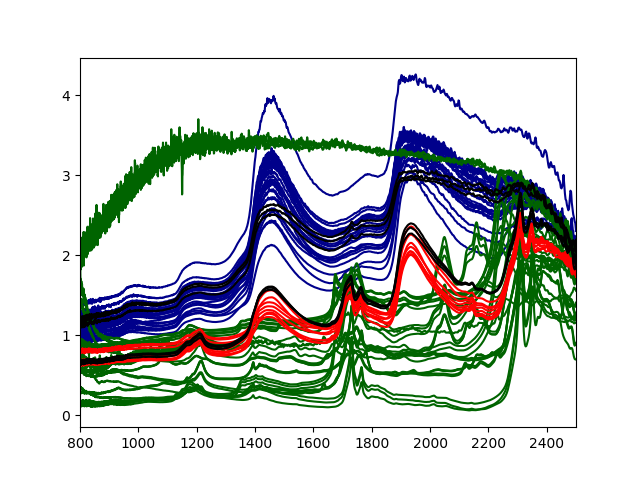

In [8]:
def get_columns(col_type):
    if col_type == "chicken":
        return [col for col in data.columns if (col_type in col) and ("fat" not in col) ]
    elif col_type == "fat":
        return [col for col in data.columns if (col_type in col) and ("plastic" not in col) ]
    elif col_type == "plastic":
        return [col for col in data.columns if (col_type in col) and ("fat" not in col) and ("fillet" not in col) ]
    else:
        return [col for col in data.columns if col_type in col]
    

ax = data[get_columns("chicken")].plot(color='DarkBlue', label='Chicken', legend=False)
data[get_columns("plastic")].plot(color='DarkGreen', label='Plastic', ax=ax, legend=False)
data[get_columns("fat")].plot(color='Red', label='Fat', ax=ax, legend=False)
data[get_columns("plastic_marel_liner")].plot(color='Black', label='Fat', ax=ax, legend=False)
plt.show()

# handles, labels = ax.get_legend_handles_labels()
# fig = ax.get_figure()


<IPython.core.display.Javascript object>


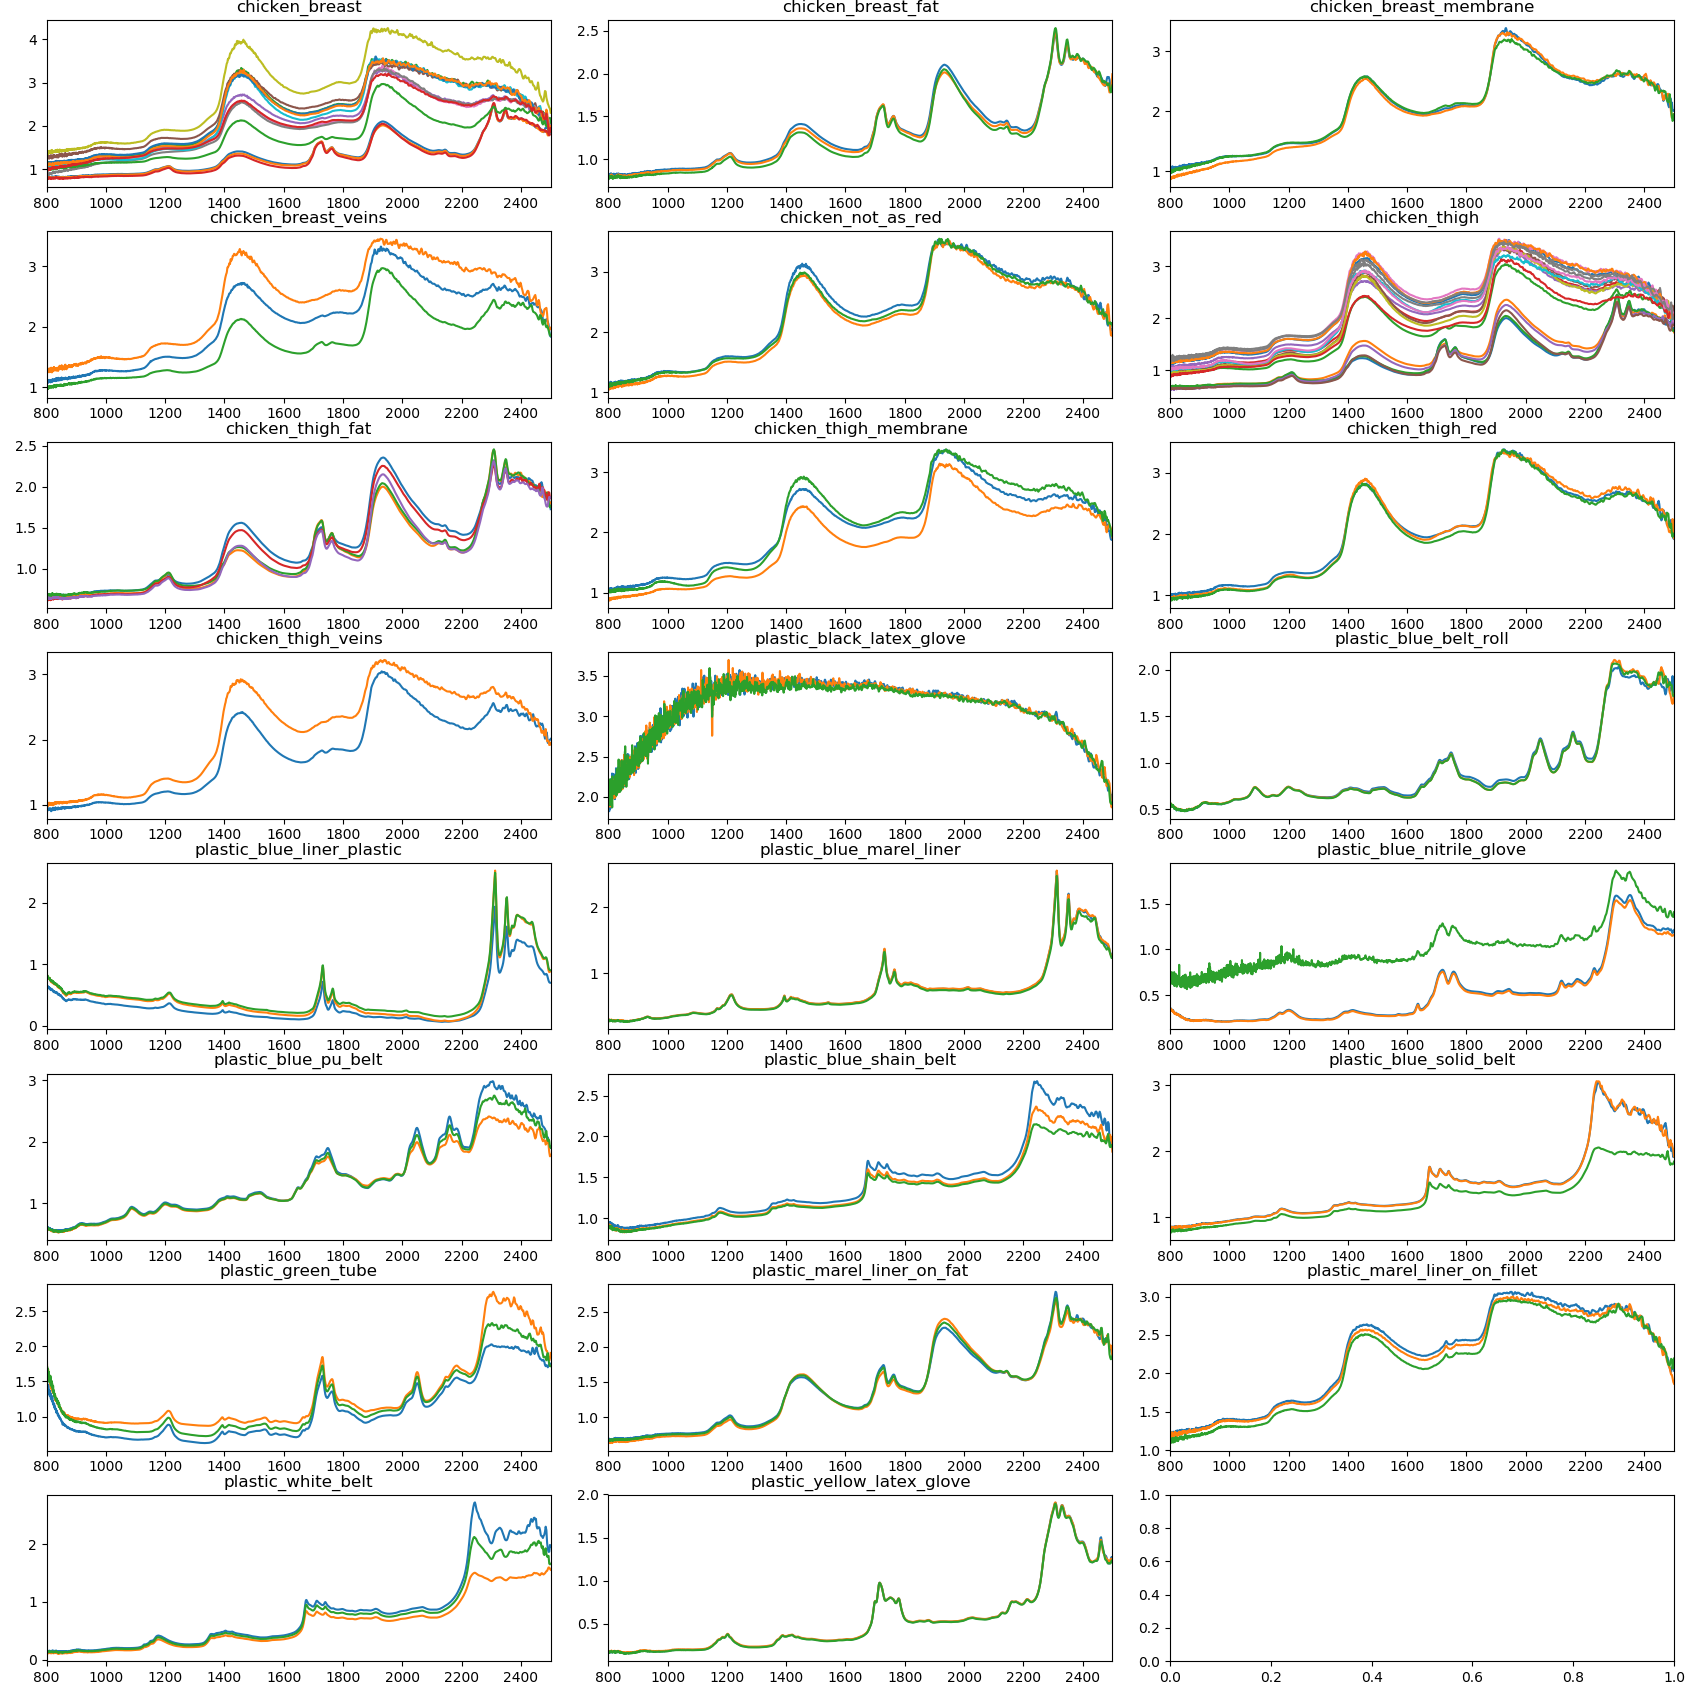

In [9]:
samples = list(set([col[:-2] for col in data.columns]))
samples.sort()

nrows=8
ncols=3

def get_next(count):
    i = count // ncols
    j = count % ncols
    return i, j
    
fig, axes = plt.subplots(figsize=(17, 17), nrows=nrows, ncols=ncols)
fig.tight_layout()

count = 0
for sampl in samples:
    i, j = get_next(count)
    data[get_columns(sampl)].plot(ax=axes[i, j], legend=False)
    axes[i, j].set_title(sampl)
    count += 1

['plastic_marel_liner_on_fillet_3', 'plastic_marel_liner_on_fat_1', 'plastic_marel_liner_on_fillet_2', 'plastic_marel_liner_on_fat_2', 'plastic_marel_liner_on_fat_3', 'plastic_marel_liner_on_fillet_1']


<IPython.core.display.Javascript object>


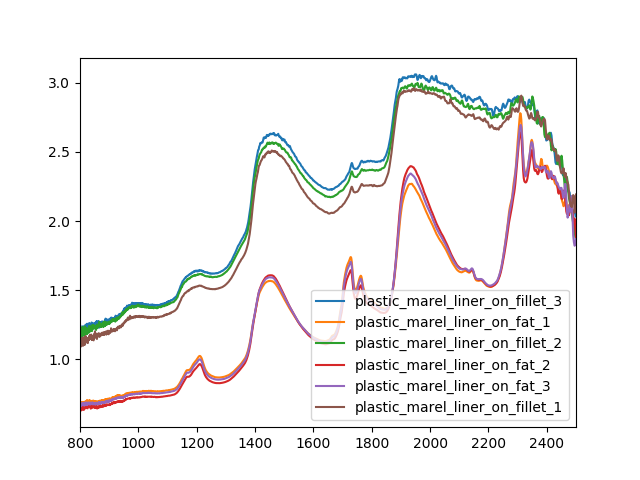

In [10]:
liner_col = get_columns("plastic_marel_liner")
print(liner_col)
ax = data[get_columns("plastic_marel_liner")].plot(label='Chicken');

In [11]:
# Take one spectra -> chicken 
# Add the obsorbtion bands
#   - H20
# Subtract straight PartialLeastSquares line from the spectra
# Shift the spectra down so that the min-y is zero
# Plot the first and second derivative

# TODO: Check this -> https://nirpyresearch.com/two-scatter-correction-techniques-nir-spectroscopy-python/

In [12]:
def rolling_mean(series, window_size):
    out = series.rolling(window_size).mean()
    out.iloc[:window_size] = series.iloc[:window_size].mean()
    
    return out

# pd.options.display.max_rows = 70

# series = df['chicken_breast_2']
# series.iloc[:2], series.iloc[:2].mean(), rolling_mean(series, 20)

In [28]:
from scipy.signal import savgol_filter

pd.options.display.max_rows = 10
df = data[['chicken_breast_2']].copy()
df['chicken_breast_2'] = rolling_mean(df['chicken_breast_2'], 20) # Smooth out
df['chicken_breast_2_min_offset'] = df - df.min()

# Get the linear best fit
reg = LinearRegression().fit(np.array(df.index).reshape(-1, 1), np.array(df['chicken_breast_2']))
linear_fit = reg.predict(np.array(df.index).reshape(-1, 1))
df['linear_fit'] = linear_fit
df['chicken_breast_2_linear_fit_subtract'] = df['chicken_breast_2'] - linear_fit

# Get the first derivative. Maybe re-think -> https://stackoverflow.com/questions/23419193/second-order-gradient-in-numpy
index = np.array(df.index)
step_size = index[1:] - index[:-1]
step_size = np.insert(step_size, 0, 0)
# index, index[1:], index[:-1], index[1:] - index[:-1], step_size, 
grad = np.gradient(df['chicken_breast_2'], np.cumsum(step_size))
df['chicken_breast_2_diff1'] = grad
df['chicken_breast_2_diff1_improved'] = savgol_filter(df['chicken_breast_2'], 63, polyorder = 2,deriv=1)

# # Second derivative
df['chicken_breast_2_diff2'] = np.gradient(grad, np.cumsum(step_size))
df['chicken_breast_2_diff2_improved'] = savgol_filter(df['chicken_breast_2'], 63, polyorder = 2,deriv=2)

# Smooth
# df['chicken_breast_2_smooth'] = df['chicken_breast_2'].rolling(20).mean()

# df['chicken_breast_2_diff1'] = df['chicken_breast_2'].diff()
# df['chicken_breast_2_diff2'] = df['chicken_breast_2'].diff(2)

<IPython.core.display.Javascript object>


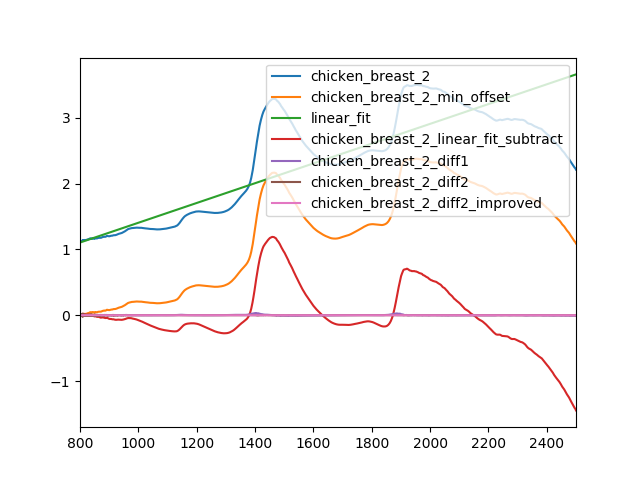

In [16]:
df.plot()

<IPython.core.display.Javascript object>


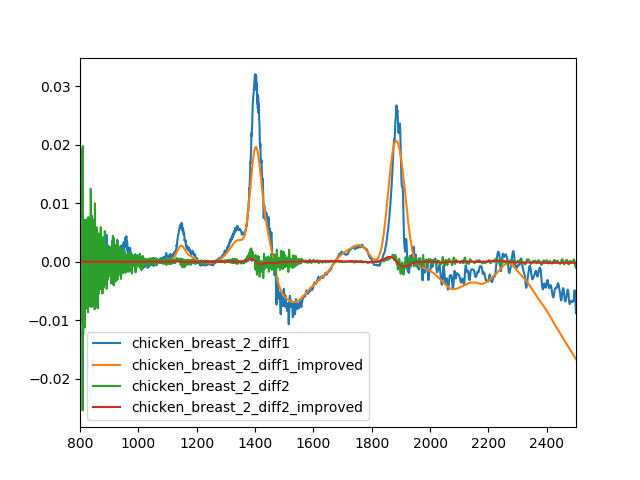

In [29]:
df[['chicken_breast_2_diff1', 'chicken_breast_2_diff1_improved', 'chicken_breast_2_diff2', 'chicken_breast_2_diff2_improved']].plot()

<IPython.core.display.Javascript object>


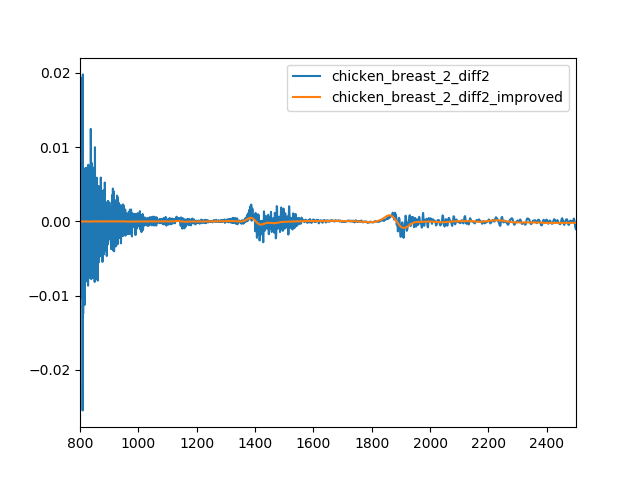

In [18]:
df[['chicken_breast_2_diff2', 'chicken_breast_2_diff2_improved']].plot()

<IPython.core.display.Javascript object>


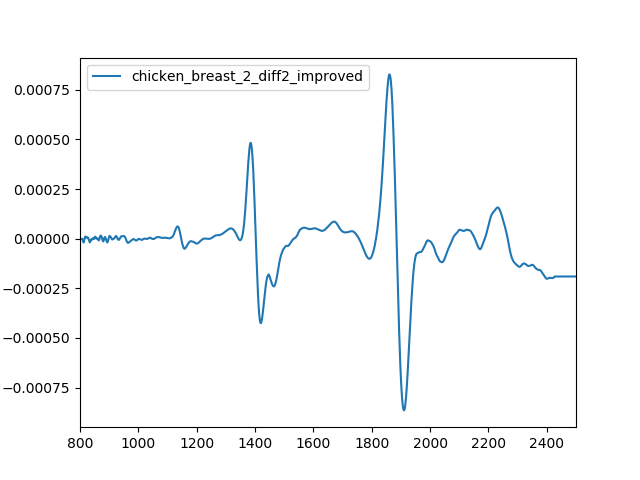

In [27]:
df[['chicken_breast_2_diff2_improved']].plot();

In [22]:
# # Add the absorbtion bands...
# serc_pixel_df = pd.DataFrame()
# serc_pixel_df['refl_5000_500'] = sercRefl[5000,500,:]/sercRefl_md['scaleFactor']
# serc_pixel_df['refl_7500_500'] = sercRefl[7500,500,:]/sercRefl_md['scaleFactor']
# serc_pixel_df['wavelengths'] = w

# fig = plt.figure(figsize=(15,10))
# ax1 = fig.add_subplot(2,2,1)

# serc_pixel_df.plot(ax=ax1,x='wavelengths',y='refl_5000_500',kind='scatter',color='red',edgecolor='none');
# plt.title('Spectral Signature for SERC Pixel (5000,500)')
# ax1.set_xlim([np.min(wavelengths),np.max(wavelengths)]); 
# ax.set_ylim([np.min(serc_pixel_df['refl_5000_500']),np.max(serc_pixel_df['refl_5000_500'])*1.2])
# ax1.set_ylim(0,0.25)
# ax1.set_xlabel("Wavelength, nm"); ax.set_ylabel("Reflectance")
# ax1.grid('on')

# plt.plot((1340,1340),(0,1.5), 'r--')
# plt.plot((1445,1445),(0,1.5), 'r--')
# plt.plot((1790,1790),(0,1.5), 'r--')
# plt.plot((1955,1955),(0,1.5), 'r--')

# ax1.text(1375,0.205, 'Band Window 1: 1340-1445 nm', rotation='vertical')
# ax1.text(1850,0.205, 'Band Window 2: 1790-1955 nm', rotation='vertical')

# ax2 = fig.add_subplot(2,2,3)
# serc_pixel_df.plot(ax=ax2,x='wavelengths',y='refl_7500_500',kind='scatter',color='orange',edgecolor='none');
# plt.title('Spectral Signature for SERC Pixel (7500,500)')
# ax2.set_xlim([np.min(wavelengths),np.max(wavelengths)]); 
# ax.set_ylim([np.min(serc_pixel_df['refl_7500_500']),np.max(serc_pixel_df['refl_7500_500'])*1.2])
# ax2.set_ylim(0,0.25)
# ax2.set_xlabel("Wavelength, nm"); ax.set_ylabel("Reflectance")
# ax2.grid('on')

# plt.plot((1340,1340),(0,1.5), 'r--')
# plt.plot((1445,1445),(0,1.5), 'r--')
# plt.plot((1790,1790),(0,1.5), 'r--')
# plt.plot((1955,1955),(0,1.5), 'r--')

# ax2.text(1375,0.205, 'Band Window 1: 1340-1445 nm', rotation='vertical')
# ax2.text(1850,0.205, 'Band Window 2: 1790-1955 nm', rotation='vertical')

# # Plot RGB image of SERC flight line and location of pixel for reference:
# # serc_rgbArray = stack_clean_bands(sercRefl,sercRefl_md,(19,34,58))
# # plot_band_array(serc_rgbArray,sercRefl_md['extent'],(0,100),ax=ax3,cbar='off')

# # Plot band 56 for reference
# ax3 = fig.add_subplot(1,4,3)
# serc_b56 = extract_clean_band(sercRefl,sercRefl_md,56)
# plot_band_array(serc_b56,sercRefl_md['extent'],(0,0.3),ax=ax3,cmap_title='Reflectance',colormap='terrain')
# ax3.plot(sercRefl_md['ext_dict']['xMin']+500,sercRefl_md['ext_dict']['yMax']-5000,
#         's',markersize=5,color='red')

# ax3.plot(sercRefl_md['ext_dict']['xMin']+500,sercRefl_md['ext_dict']['yMax']-7500,
#         's',markersize=5,color='orange')

# ax3.set_xlim(sercRefl_md['extent'][0],sercRefl_md['extent'][1])
# ax3.set_ylim(sercRefl_md['extent'][2],sercRefl_md['extent'][3])

In [23]:
# Setup the problem with Y as meat, fat and plastic and then X as the corresponding spectra reflectance
# Run a PLS fit on the data
# -> https://nirpyresearch.com/partial-least-squares-regression-python/
# And the do the same after preselecting the wavelength bands from the spectra to figure out "the most important spectra bands"